In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv("Crop_recommendation.csv")
display(df)

N   P   K  temperature   humidity        ph    rainfall   label
0      90  42  43    20.879744  82.002744  6.502985  202.935536    rice
1      85  58  41    21.770462  80.319644  7.038096  226.655537    rice
2      60  55  44    23.004459  82.320763  7.840207  263.964248    rice
3      74  35  40    26.491096  80.158363  6.980401  242.864034    rice
4      78  42  42    20.130175  81.604873  7.628473  262.717340    rice
...   ...  ..  ..          ...        ...       ...         ...     ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee

[2200 rows x 8 columns]

# Analizando os dados

In [4]:
df.shape

(2200, 8)

In [5]:
df["label"].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [6]:
df.isna().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

<AxesSubplot:>

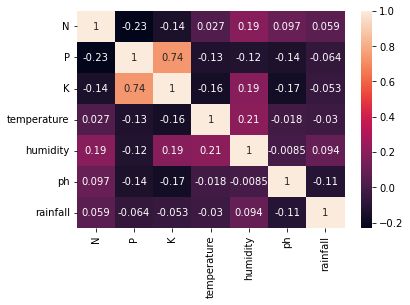

In [7]:
sns.heatmap(df.corr(),annot=True)

In [8]:
import plotly.express as px
fig = px.scatter( x = df['temperature'],
                  y = df['rainfall'],
                  color = df['label']
                     )
fig.show()

# Separando e treinando dados

In [9]:
x = df.drop(columns = 'label') 
y = df['label']                

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [10]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [11]:
lda = LinearDiscriminantAnalysis()  
lda.fit(x_train,y_train) 

LinearDiscriminantAnalysis()

In [12]:
y_predicoes = lda.predict(x_test) 

In [13]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, classification_report
print(classification_report(y_test, y_predicoes))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       0.74      0.85      0.79        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       0.94      1.00      0.97        17
      grapes       1.00      1.00      1.00        14
        jute       0.77      1.00      0.87        23
 kidneybeans       0.91      1.00      0.95        20
      lentil       0.62      0.91      0.74        11
       maize       1.00      0.95      0.98        21
       mango       0.90      1.00      0.95        19
   mothbeans       1.00      0.83      0.91        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14
      papaya       1.00    

In [14]:
from sklearn.metrics import confusion_matrix

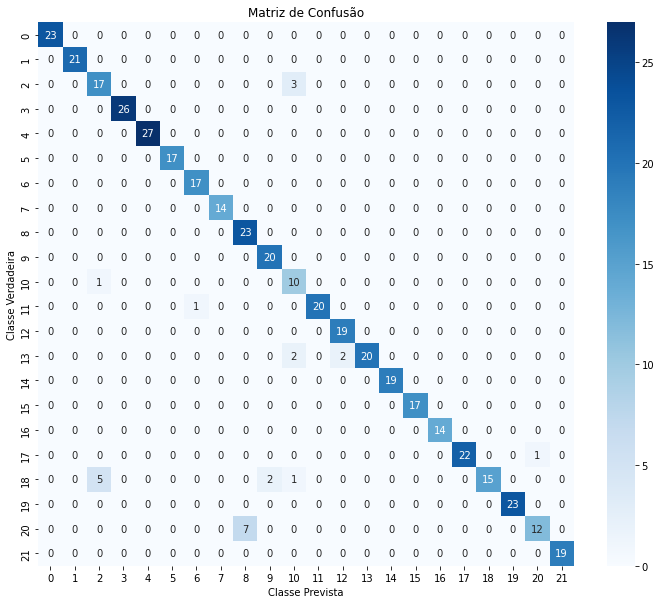

In [15]:
# Criando matriz de confusão
cm = confusion_matrix(y_test, y_predicoes)

plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusão")
plt.xlabel("Classe Prevista")
plt.ylabel("Classe Verdadeira")
plt.show()

# Mapeando os alimentos com as respostas do ML

In [16]:
mapeamento_alimentos = {
    0: 'maçã',
    1: 'banana',
    2: 'feijão preto',
    3: 'grão-de-bico',
    4: 'coco',
    5: 'café',
    6: 'algodão',
    7: 'uvas',
    8: 'juta',
    9: 'feijão vermelho',
    10: 'lentilha',
    11: 'milho',
    12: 'manga',
    13: 'feijão carioca',
    14: 'feijão moyashi',
    15: 'melão',
    16: 'laranja',
    17: 'mamão',
    18: 'sorgo',
    19: 'romã',
    20: 'arroz',
    21: 'melancia'
}

# Testando com inputs novos

In [17]:
input_example = [91,65,45,25.36059237,72.03645255,2.043496655,116.5888455]  
probabilities = lda.predict_proba([input_example])
predicted_class = np.argmax(probabilities)
predicted_alimento = mapeamento_alimentos[predicted_class]
certainty = probabilities[0][predicted_class] * 100

print(f"Alimento previsto: {predicted_alimento}")
print(f"Porcentagem de Certeza: {certainty:.2f}%")

Alimento previsto: banana
Porcentagem de Certeza: 100.00%


In [18]:
input_example = [87,50,20,25.61707368,63.4711755,7.576418207000001,108.8303762]  
probabilities = lda.predict_proba([input_example])
predicted_class = np.argmax(probabilities)
predicted_alimento = mapeamento_alimentos[predicted_class]
certainty = probabilities[0][predicted_class] * 100

print(f"Alimento previsto: {predicted_alimento}")
print(f"Porcentagem de Certeza: {certainty:.2f}%")

Alimento previsto: milho
Porcentagem de Certeza: 99.99%


# deploy

In [19]:
import joblib

In [20]:
joblib.dump(lda, 'modelo.joblib')

['modelo.joblib']